# Evaluate
We evaluate the results here

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
mat_evaluation = pd.read_csv('results/mat_evaluation_result.csv')
stat_evaluation = pd.read_csv('results/stat_evaluation_result.csv')
mat_evaluation_no_solution = pd.read_csv('results/mat_evaluation_no_solutions_result.csv')
stat_evaluation_no_solution = pd.read_csv('results/stat_evaluation_no_solutions_result.csv')
banking_no_rubrics = pd.read_csv('results/banking_no_rubrics_result.csv')
banking_with_rubrics = pd.read_csv('results/banking_with_rubrics_result.csv')

# Combine datasets for comparative analysis
all_data = {
    "MAT Evaluation": mat_evaluation,
    "STAT Evaluation": stat_evaluation,
    "MAT Evaluation (No Solution)": mat_evaluation_no_solution,
    "STAT Evaluation (No Solution)": stat_evaluation_no_solution,
    "Banking (No Rubrics)": banking_no_rubrics,
    "Banking (With Rubrics)": banking_with_rubrics,
}



In [22]:
# HELPER FUNCTIONS

# Clean negative accuracies
def clean_negative_accuracies(df):
    df["accuracy"] = df["accuracy"].apply(lambda x: max(x, 0))
    return df

# calculate descriptive statistics
def descriptive_statistics(df, dataset_name):
    stats = df["accuracy"].describe()
    print(f"Descriptive statistics for {dataset_name} accuracy:")
    print(stats)
    print("\n")
    return stats


Descriptive statistics for MAT Evaluation accuracy:
count    1000.000000
mean        0.669001
std         0.317999
min         0.000000
25%         0.500000
50%         0.500000
75%         1.000000
max         1.000000
Name: accuracy, dtype: float64


Descriptive statistics for STAT Evaluation accuracy:
count    997.000000
mean       0.662487
std        0.330323
min        0.000000
25%        0.500000
50%        0.500000
75%        1.000000
max        1.000000
Name: accuracy, dtype: float64


Descriptive statistics for MAT Evaluation (No Solution) accuracy:
count    1000.000000
mean        0.644834
std         0.364678
min         0.000000
25%         0.500000
50%         0.500000
75%         1.000000
max         1.000000
Name: accuracy, dtype: float64


Descriptive statistics for STAT Evaluation (No Solution) accuracy:
count    916.000000
mean       0.617358
std        0.332459
min        0.000000
25%        0.500000
50%        0.500000
75%        1.000000
max        1.000000
Name: a

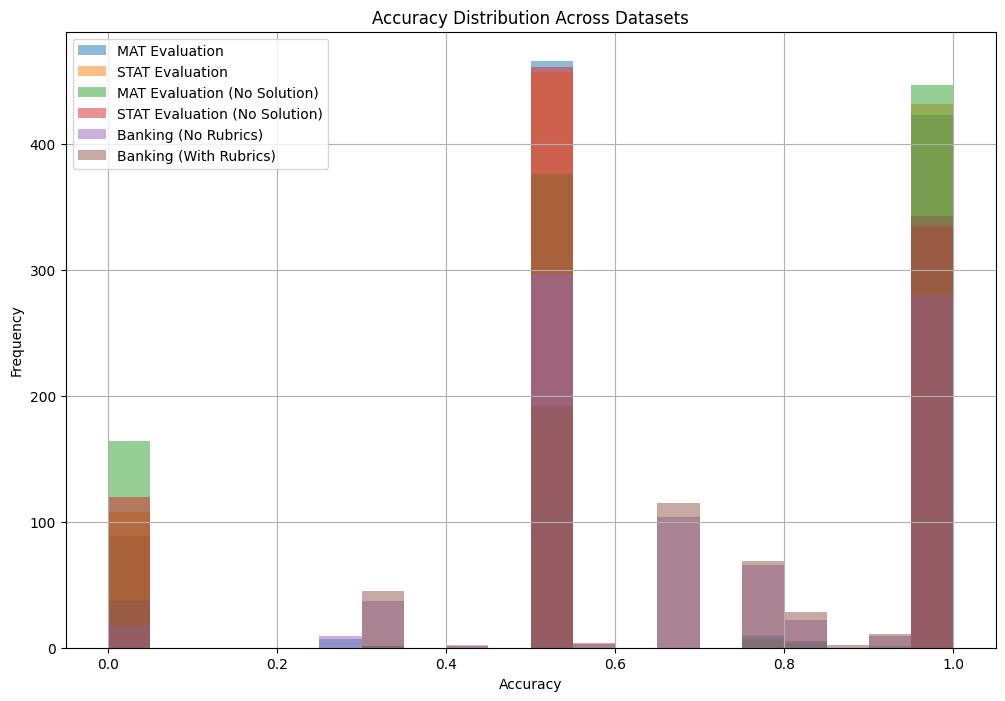

In [23]:

# Apply cleaning to all datasets
for name, df in all_data.items():
    all_data[name] = clean_negative_accuracies(df)

# Analyze accuracy across datasets
accuracy_stats = {}
for dataset_name, df in all_data.items():
    accuracy_stats[dataset_name] = descriptive_statistics(df, dataset_name)

# Visualize accuracy distribution
plt.figure(figsize=(12, 8))
for dataset_name, df in all_data.items():
    plt.hist(df["accuracy"], bins=20, alpha=0.5, label=dataset_name)
plt.title("Accuracy Distribution Across Datasets")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()


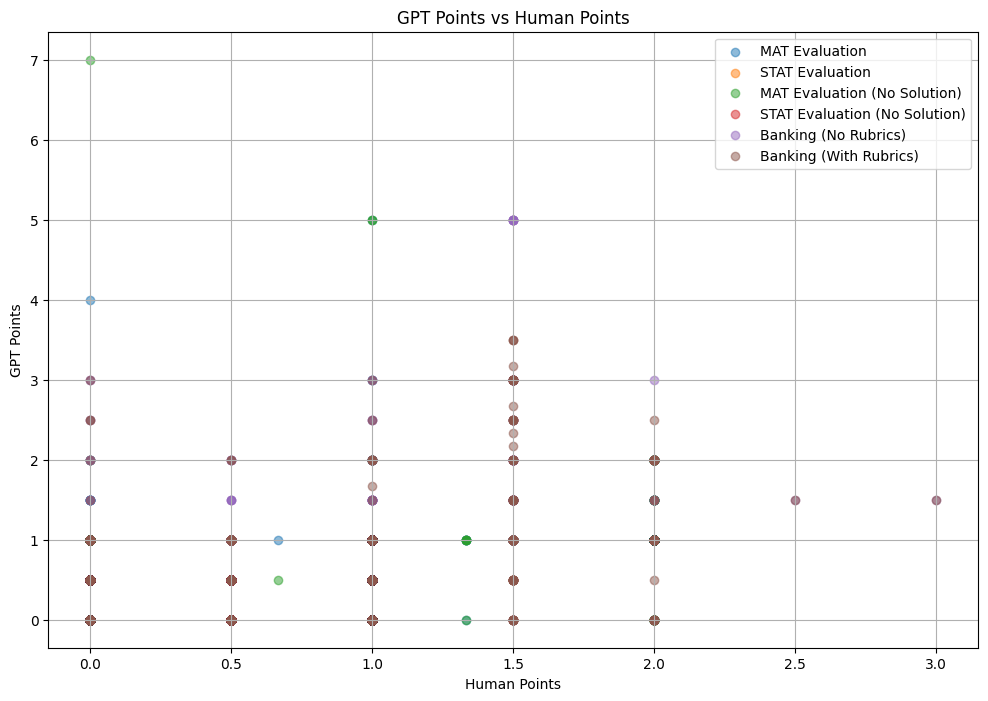

In [24]:
# Additional insights: Comparing GPT vs Human Points
plt.figure(figsize=(12, 8))
for dataset_name, df in all_data.items():
    plt.scatter(df["human_points"], df["gpt_points"], alpha=0.5, label=dataset_name)
plt.title("GPT Points vs Human Points")
plt.xlabel("Human Points")
plt.ylabel("GPT Points")
plt.legend()
plt.grid()
plt.show()


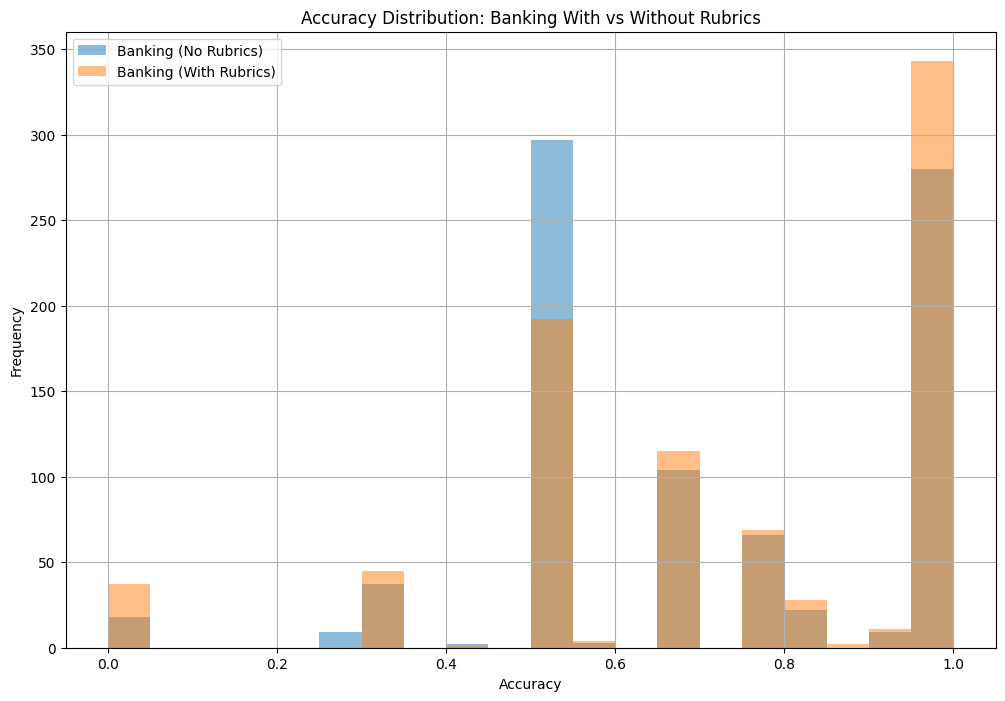

Analysis completed. Insights saved to 'accuracy_insights.csv'.


In [25]:

# Detailed analysis of Banking with and without rubrics
banking_rubrics_comparison = pd.concat([
    banking_no_rubrics.assign(rubric_type="No Rubrics"),
    banking_with_rubrics.assign(rubric_type="With Rubrics")
])

plt.figure(figsize=(12, 8))
for rubric_type, group in banking_rubrics_comparison.groupby("rubric_type"):
    plt.hist(group["accuracy"], bins=20, alpha=0.5, label=f"Banking ({rubric_type})")
plt.title("Accuracy Distribution: Banking With vs Without Rubrics")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

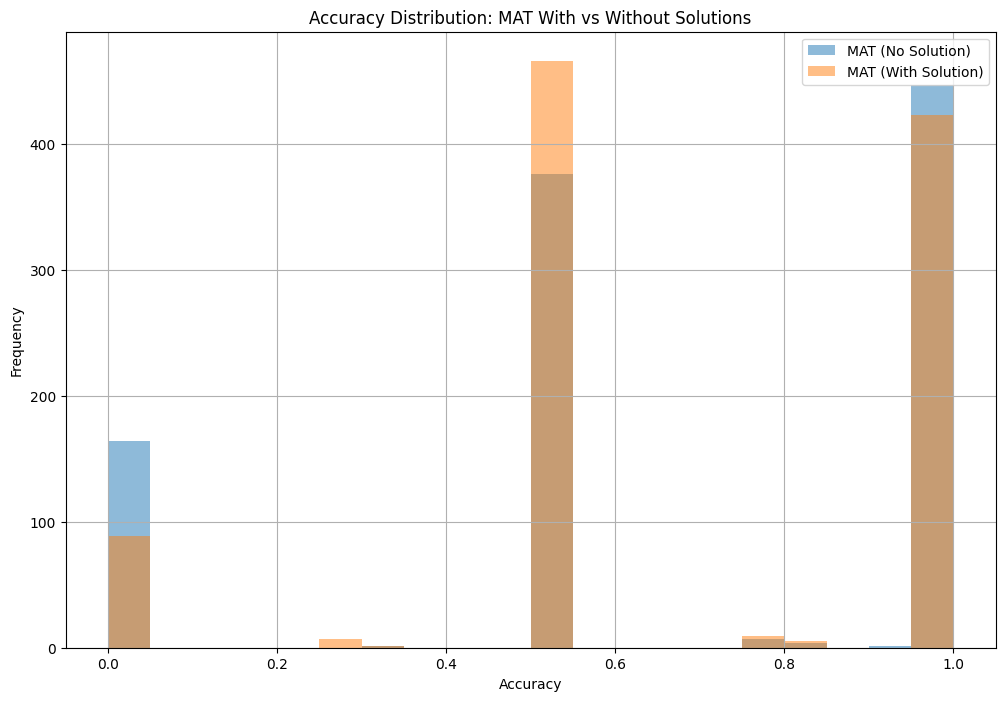

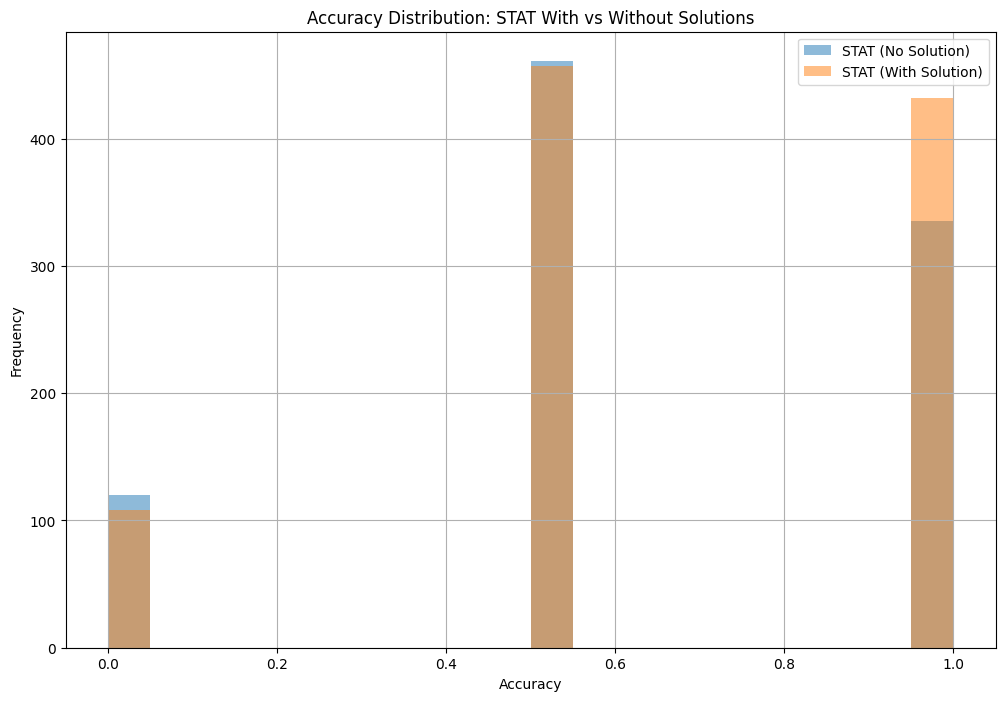

In [27]:
# Detailed analysis for MAT and STAT datasets (with and without solutions)
mat_comparison = pd.concat([
    mat_evaluation.assign(solution_type="With Solution"),
    mat_evaluation_no_solution.assign(solution_type="No Solution")
])

stat_comparison = pd.concat([
    stat_evaluation.assign(solution_type="With Solution"),
    stat_evaluation_no_solution.assign(solution_type="No Solution")
])

# Plot Accuracy Distribution for MAT datasets
plt.figure(figsize=(12, 8))
for solution_type, group in mat_comparison.groupby("solution_type"):
    plt.hist(group["accuracy"], bins=20, alpha=0.5, label=f"MAT ({solution_type})")
plt.title("Accuracy Distribution: MAT With vs Without Solutions")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

# Plot Accuracy Distribution for STAT datasets
plt.figure(figsize=(12, 8))
for solution_type, group in stat_comparison.groupby("solution_type"):
    plt.hist(group["accuracy"], bins=20, alpha=0.5, label=f"STAT ({solution_type})")
plt.title("Accuracy Distribution: STAT With vs Without Solutions")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()



                         Dataset  Average Accuracy  Max Accuracy  \
0                 MAT Evaluation              0.67           1.0   
1                STAT Evaluation              0.66           1.0   
2   MAT Evaluation (No Solution)              0.64           1.0   
3  STAT Evaluation (No Solution)              0.62           1.0   
4           Banking (No Rubrics)              0.70           1.0   
5         Banking (With Rubrics)              0.73           1.0   

   Min Accuracy  Std Deviation  
0           0.0           0.32  
1           0.0           0.33  
2           0.0           0.36  
3           0.0           0.33  
4           0.0           0.25  
5           0.0           0.27  


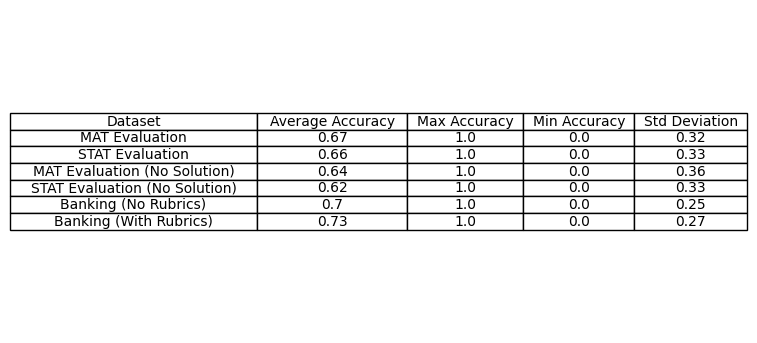

Table saved as PNG: accuracy_insights_table.png


In [32]:
# Save insights to a CSV
insights = []
for dataset_name, df in all_data.items():
    avg_accuracy = df["accuracy"].mean()
    max_accuracy = df["accuracy"].max()
    min_accuracy = df["accuracy"].min()
    std_accuracy = df["accuracy"].std()
    insights.append({
        "Dataset": dataset_name,
        "Average Accuracy": avg_accuracy,
        "Max Accuracy": max_accuracy,
        "Min Accuracy": min_accuracy,
        "Std Deviation": std_accuracy
    })
    
insights_rounded = []
for dataset_name, df in all_data.items():
    avg_accuracy = df["accuracy"].mean()
    max_accuracy = df["accuracy"].max()
    min_accuracy = df["accuracy"].min()
    std_accuracy = df["accuracy"].std()
    insights_rounded.append({
        "Dataset": dataset_name,
        "Average Accuracy": round(avg_accuracy, 2),
        "Max Accuracy": round(max_accuracy, 2),
        "Min Accuracy": round(min_accuracy, 2),
        "Std Deviation": round(std_accuracy, 2)
    })

# Create DataFrame
insights_df = pd.DataFrame(insights_rounded)
# Create DataFrame
insights_df_raw = pd.DataFrame(insights)

# Save to CSV
csv_path = "accuracy_insights.csv"
insights_df_raw.to_csv(csv_path, index=False)

# Generate a pyplot table
fig, ax = plt.subplots(figsize=(6, len(insights_df) * 0.7))  # Adjust figure size based on the number of rows
ax.axis('tight')
ax.axis('off')

# Create table
table = ax.table(
    cellText=insights_df.values,
    colLabels=insights_df.columns,
    cellLoc='center',
    loc='center'
)

# Adjust font size and layout
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(insights_df.columns))))

# Save the table as a PNG image
png_path = "accuracy_insights_table.png"
plt.savefig(png_path, bbox_inches='tight', dpi=300)

print(insights_df)

plt.show()

print(f"Table saved as PNG: {png_path}")

In [35]:
from sklearn.metrics import cohen_kappa_score

# Updated function with validation and logging of dropped data points
def calculate_qwk(dataframe, dataset_name):
    # Extract relevant columns
    human_points = dataframe['human_points']
    gpt_points = dataframe['gpt_points']

    # Ensure no missing data
    valid_rows = human_points.notna() & gpt_points.notna()

    # Validate 0.5 step conformity
    human_valid = ((human_points * 2) % 1 == 0)
    gpt_valid = ((gpt_points * 2) % 1 == 0)
    conformity_valid = valid_rows & human_valid & gpt_valid

    # Log removed data points
    invalid_count = (~conformity_valid).sum()
    if invalid_count > 0:
        print(f"[{dataset_name}] Invalid rows removed due to non-conformance to 0.5 steps: {invalid_count}")

    # Filter valid rows
    human_points = human_points[conformity_valid] * 2  # Scale to integer steps
    gpt_points = gpt_points[conformity_valid] * 2  # Scale to integer steps

    # Convert to integers
    human_points = human_points.astype(int)
    gpt_points = gpt_points.astype(int)

    # Calculate QWK
    qwk = cohen_kappa_score(human_points, gpt_points, weights='quadratic')
    return qwk, invalid_count




In [36]:
# Calculate QWK for all datasets with validation
qwk_results = {}
invalid_counts = {}
for dataset_name, df in all_data.items():
    qwk, invalid_count = calculate_qwk(df, dataset_name)
    qwk_results[dataset_name] = qwk
    invalid_counts[dataset_name] = invalid_count

# Display results
qwk_results_df = pd.DataFrame.from_dict(qwk_results, orient='index', columns=['QWK']).reset_index()
qwk_results_df.rename(columns={'index': 'Dataset'}, inplace=True)
invalid_counts_df = pd.DataFrame.from_dict(invalid_counts, orient='index', columns=['Invalid Rows Removed']).reset_index()
invalid_counts_df.rename(columns={'index': 'Dataset'}, inplace=True)

# Save results to CSV
qwk_results_df.to_csv("qwk_results.csv", index=False)
invalid_counts_df.to_csv("invalid_counts.csv", index=False)

# Display results
print("QWK Results:")
print(qwk_results_df)
print("\n")
print("Invalid Row Counts:")
print(invalid_counts_df)


print("QWK calculations completed. Results saved to 'qwk_results.csv' and invalid rows logged to 'invalid_counts.csv'.")

[MAT Evaluation] Invalid rows removed due to non-conformance to 0.5 steps: 6
[STAT Evaluation] Invalid rows removed due to non-conformance to 0.5 steps: 2
[MAT Evaluation (No Solution)] Invalid rows removed due to non-conformance to 0.5 steps: 6
[STAT Evaluation (No Solution)] Invalid rows removed due to non-conformance to 0.5 steps: 2
[Banking (With Rubrics)] Invalid rows removed due to non-conformance to 0.5 steps: 5
QWK Results:
                         Dataset       QWK
0                 MAT Evaluation  0.342570
1                STAT Evaluation  0.325167
2   MAT Evaluation (No Solution)  0.312624
3  STAT Evaluation (No Solution)  0.211936
4           Banking (No Rubrics)  0.371716
5         Banking (With Rubrics)  0.455022


Invalid Row Counts:
                         Dataset  Invalid Rows Removed
0                 MAT Evaluation                     6
1                STAT Evaluation                     2
2   MAT Evaluation (No Solution)                     6
3  STAT Evaluation (N